In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import expon
from scipy.stats import uniform
from scipy.stats import norm

In [2]:
poblacion = pd.DataFrame()
poblacion['numbers'] = expon.rvs(40,size = 100000)

<AxesSubplot:>

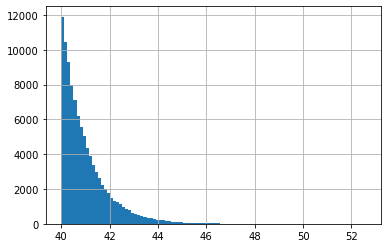

In [3]:
poblacion['numbers'].hist(bins=100)

In [5]:
muestra_promedio = []
tamano = 5000

for i in range(0,tamano):
    muestra_promedio.append(poblacion.sample(n=100).mean().values[0])

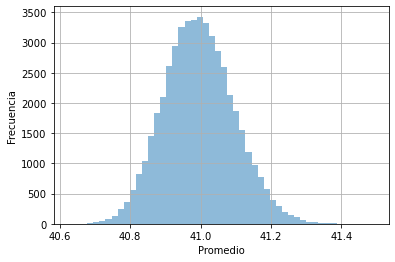

In [11]:
fig,ax = plt.subplots()
ax.hist(muestra_promedio,bins = 50, alpha=0.5)
ax.set(xlabel='Promedio',ylabel ='Frecuencia')
ax.grid()

# Pruebas de Hipotesis

In [4]:
muestra = [42, 35, 29, 45, 41, 57, 54, 47, 48, 56, 47, 35, 52, 31, 52, 55, 57, 58, 26, 29, 32, 37, 32, 34, 48, 20, 48, 51, 27, 24, 39, 40, 31, 34, 23, 24, 41, 58, 44, 48, 31, 23, 27, 55, 43, 47, 30, 57, 38, 51]

In [5]:
# Hipotesis
media,var,skew,kurt = expon.stats(scale = 30,moments = 'mvsk')

In [6]:
# Paso 1 : Parametro Lambda
# Paso 2 : HP

mu = 30
mu > 30

# Mejor estimador
promedio = np.mean(muestra)
promedio

40.66

In [7]:
z = (np.mean(muestra)- mu) / np.sqrt(var/50)

In [8]:
z

2.5125860958161983

In [9]:
alpha = 0.05
# criterios de rechazo
data_norm = norm.rvs(size = 100000)
valor_critico = norm.ppf(1-alpha,loc=0,scale=1)

C:\Users\GAMER\anaconda3\envs\dataAnalyst\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


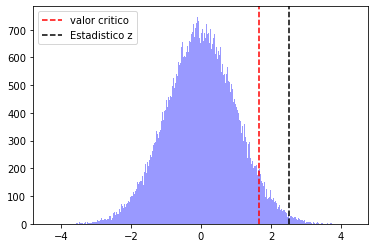

In [10]:
ax = sns.distplot(data_norm,bins = 500, kde=False,color='blue')
ax.axvline(x=valor_critico,linestyle='--',label='valor critico',color='red') 
ax.axvline(x=z,linestyle='--',label='Estadistico z',color='k')
ax.legend()


In [11]:
mu1 = 37
mu2 = 42

promedio = np.mean(muestra)

desv = 2

z_1 = (promedio- mu1) / desv
z_2 = (promedio- mu2) / desv

In [12]:
data1 = norm.rvs(loc = mu1, scale = desv, size =100000)
data2 = norm.rvs(loc = mu2, scale = desv, size =100000)

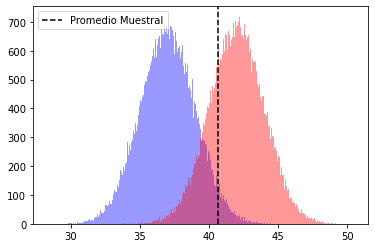

In [13]:
ax = sns.distplot(data1,kde=False,bins=500,color='blue')
ax = sns.distplot(data2,kde=False,bins=500,color='red')
ax.axvline(x=promedio,c='k',linestyle='--',label='Promedio Muestral')
ax.legend()

In [19]:
# Error tipo I: Rechazar Ho Dado que si es verdadera
p_prom_mu1 = norm.cdf(z_1)
p_prom_mu1

0.9663750305803716

In [15]:
# Error tipo II: No rechazar Ho y H1 es verdadera
p_prom_mu2 = norm.cdf(z_2)
1-p_prom_mu2

0.7485711049046905

In [16]:
Muestra = [4046, 2578, 3796, 3412, 3315, 3228, 3666, 3877, 3154, 4062, 4365, 3776, 3761, 2587, 2911, 3184, 3810, 4459, 3385, 3899, 3602, 2701, 2821, 2790, 2557, 2540, 4119, 2712, 2743, 2713, 4466, 3937, 3871, 4427, 3177, 2556, 2903, 3522, 4155, 4010, 4453, 3080, 3008, 3865, 3356, 2799, 3308, 2759, 4347, 2576, 4075, 3333, 2936, 3746, 3334, 3940, 4113, 4220, 3580, 3922]

In [18]:
alpha = 0.05
lim_inf = norm.ppf(alpha/2)
lim_sup = norm.ppf(1-alpha/2)
lim_inf,lim_sup

(-1.9599639845400545, 1.959963984540054)

In [71]:
promedio = np.mean(Muestra)
desviacion = np.mean(Muestra)
len(Muestra)

60

In [74]:
lim_inf = (norm.ppf(alpha/2))*desviacion + promedio
lim_sup = (norm.ppf(1-alpha/2))*desviacion + promedio
lim_inf,lim_sup

(-3333.362940517143, 10278.129607183808)